# Homework 1

1. [Boxplots](#Boxplots)
    * Quantiles
    * Whiskers
2. [Correlation](#Correlation)
3. [Power](#Power)

### Explore the Titanic Data

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Boxplots

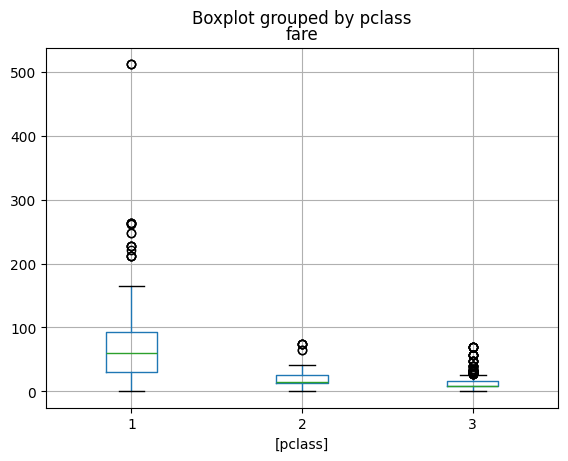

In [24]:
boxplot = titanic[['fare','pclass']].boxplot(by='pclass',return_type='dict' )

## Task 1

1. Read up the basics of boxplots: https://en.wikipedia.org/wiki/Box_plot, in particular the paragraph explaining the **whiskers**.

2. **What are the exact values of the lower and upper whiskers (of fare) for the pclass2 passengers?**

Recall the Wikipedia definition:<br><br>*From above the upper quartile, a distance of 1.5 times the IQR is measured out and a whisker is drawn up to the largest observed point from the dataset that falls within this distance. Similarly, a distance of 1.5 times the IQR is measured out below the lower quartile and a whisker is drawn up to the lower observed point from the dataset that falls within this distance.*

In [25]:
# What are the exact values of the lower and upper whiskers (of fare) for the pclass2 passengers?

class2_fare_subset = titanic[titanic['pclass'] ==2 ]['fare']
q1 = np.quantile(class2_fare_subset,0.25)
q3 = np.quantile(class2_fare_subset,0.75)
iqr = q3-q1

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

max_in_whiskers = np.max(class2_fare_subset[class2_fare_subset <= upper_limit])
min_in_whiskers = np.min(class2_fare_subset[class2_fare_subset >= lower_limit] )

print('The max value inside the whiskers is: ', max_in_whiskers, '. The min value inside the whiskers is: ' ,min_in_whiskers)

The max value inside the whiskers is:  41.5792 . The min value inside the whiskers is:  0.0


## Explore the Auto Data

In [26]:
url = "https://raw.githubusercontent.com/markusloecher/DataScience-HWR/refs/heads/main/data/Auto.csv"

df = pd.read_csv(url)
df.head()
#df.info()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,Manufacturer
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,chevrolet
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,buick
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,plymouth
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,amc
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,ford


In [27]:
# global mean
df[['mpg','cylinders','displacement','horsepower','weight','acceleration','year', 'origin']].mean()

mpg               23.445918
cylinders          5.471939
displacement     194.411990
horsepower       104.469388
weight          2977.584184
acceleration      15.541327
year              75.979592
origin             1.576531
dtype: float64

In [28]:
# mpg mean
a = df["mpg"].mean()
b = df.iloc[:,0].mean()
c = np.mean(df["mpg"])

print(f'mpg mean:\na = {a}\nb = {b}\nc = {c}')

mpg mean:
a = 23.445918367346938
b = 23.445918367346938
c = 23.445918367346938


(array([ 3., 10., 40., 38., 36., 37., 29., 29., 20., 33., 24., 24., 20.,
        17., 13.,  9.,  3.,  1.,  5.,  1.]),
 array([ 9.  , 10.88, 12.76, 14.64, 16.52, 18.4 , 20.28, 22.16, 24.04,
        25.92, 27.8 , 29.68, 31.56, 33.44, 35.32, 37.2 , 39.08, 40.96,
        42.84, 44.72, 46.6 ]),
 <BarContainer object of 20 artists>)

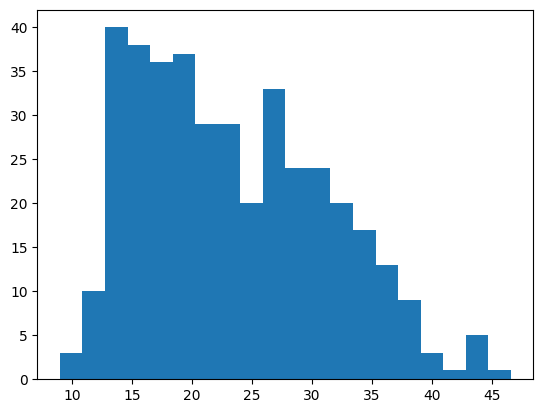

In [29]:
#. Plot a histogram of mpg
plt.hist(df["mpg"], 20)

Text(0, 0.5, 'mpg')

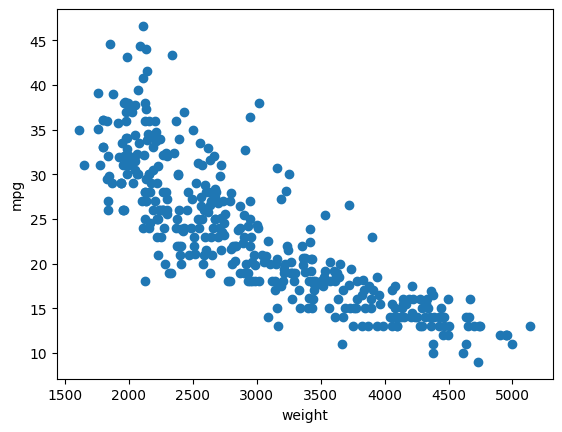

In [30]:
#scatterplot
plt.scatter("weight", "mpg",data=df)
plt.xlabel("weight")
plt.ylabel("mpg")

## Correlation

1. Compute the mean mpg grouped by cylinder.
2. Create a boxplot of mpg vs. cylinder
3. Find the median and lower/upper quartiles
4. Read up the definition of **correlation**. ( *ThinkStats* book in the cloud folder). Compute the correlation coefficient between *mpg* and *weight*.
5. Compute the correlation coefficient $\rho$ between *mpg* and *origin*. Discuss whether (i) there is a conceptual difference between the previous task, and (ii) whether it even makes sense to compute $\rho$ for this pair of variables. In that context, learn about [categorical data types in pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html).
6. What is the correlation coefficient "good for" ? Can you e.g. use it to make predictions, like in our previous simple probability model ? If not, what is missing ? Think about a *loss function* which would make sense for such a prediction task.


**No.1** - Compute the mean mpg grouped by cylinder.


In [31]:
df.groupby('cylinders')['mpg'].mean()

cylinders
3    20.550000
4    29.283920
5    27.366667
6    19.973494
8    14.963107
Name: mpg, dtype: float64

**No.2** - Create a boxplot of mpg vs. cylinder

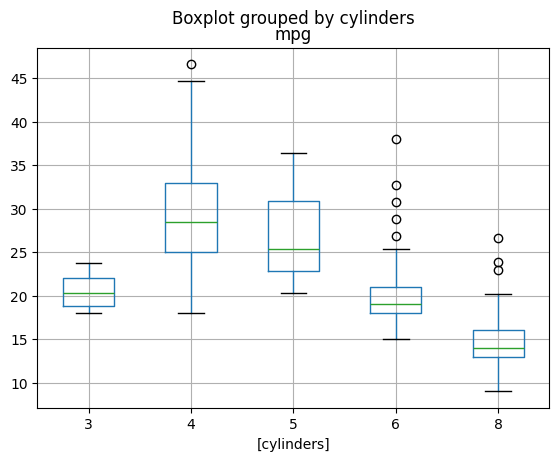

In [32]:
boxplot = df[['mpg','cylinders']].boxplot(by='cylinders',return_type='dict' )

**No3** - Find the median and lower/upper quartiles

In [33]:
mpg_mean = df["mpg"].mean()
weight_mean = df['weight'].mean()

mpg_q1 = np.quantile(df["mpg"], 0.25)
mpg_q3 = np.quantile(df["mpg"], 0.75)

**No4** - Compute the correlation coefficient between mpg and weight.

In [34]:
mpg_z = (df['mpg']-mpg_mean)/df['mpg'].std()
weight_z = (df['weight']-weight_mean)/df['weight'].std()

corr_coef_mpg_weight = (mpg_z*weight_z).mean()

**No5** - Compute the correlation coefficient between mpg and origin. Discuss whether (i) there is
a conceptual difference between the previous task, and (ii) whether it even makes sense to compute for this pair of 
variables. In that context, learn about categorical data types in pandas.

In [35]:
origin_mean = df["origin"].mean()
origin_z = (df['origin']-origin_mean)/df['origin'].std()

corr_coef_mpg_origin = (origin_z*weight_z).mean()

### (I)
No4 looks at the relationship betweeen weight and mpg, while No5 looks at dependencies betweeen mpg and origin. Since both weight and mpg are quantitive values it makes sense to look for correlation. In no5 this concept doesn't apply because origin is most likely a categorical value.
### (II)
Since origin isn't a quantity, the correlation calculation itself is invalid.

----------------------------------

## Power

Let us explore the **power** of a statistical test which is the ability to differentiate between nearby parameter values in observed data.

Using our function `toss_biased_coin()` developed in class:
1. Recreate the histogram for `pHead=0.5, n= 10`. Define thresholds to both sides of **0.5** such that your **type I error** (the probability of **falsely rejecting** the hypothesis $H_0: p=0.5$) is no more than $\alpha=0.05$).
2. Now create three more histograms, with:
   1. `pHead=0.6, n= 10`
   2. `pHead=0.7, n= 10`
   3. `pHead=0.8, n= 10`
3. For each of these, compute the **type II error** (the probability of **falsely failing to reject** the hypothesis $H_0: p=0.5$)
4. What happens to this error, when you increase sample size to $n=100$ ?

In [94]:
def toss_biased_coin(pHead, n, seed=None):
  """
    Simulates n tosses of a biased coin and returns the proportion of heads,
    using rng.choice() for better conceptual clarity.

    Parameters
    ----------
    p : float
        Probability of heads (between 0 and 1).
    n : int
        Number of tosses.
    seed : int, optional
        Random seed for reproducibility.

    Returns
    -------
    float
        Proportion of heads observed.
    """
  rng = np.random.default_rng(seed)

  tosses = rng.choice([0,1], size=n, p=[1-pHead,pHead])
  cts = np.sum(tosses == 1)
  cts = np.sum(tosses)
  prop_heads = cts/n

  prop_heads = np.mean(tosses)

  return prop_heads

# No1

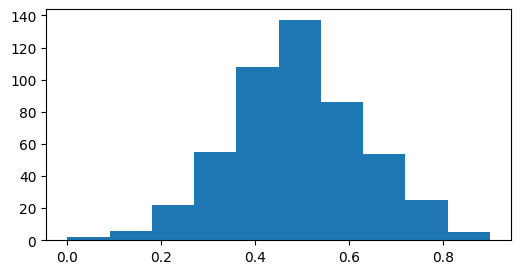

In [107]:
# running multiple times to produce histogram
pHead_obs = np.zeros(500)

for i in range(500):
  pHead_obs[i] = toss_biased_coin(pHead=0.5, n= 10)

plt.figure(figsize=[6,3]);
plt.hist(pHead_obs);

In [108]:
# Define thresholds -> alpha = 0.05 
lower_thresh, upper_thresh = np.percentile(pHead_obs, [2.5, 97.5])

# No2

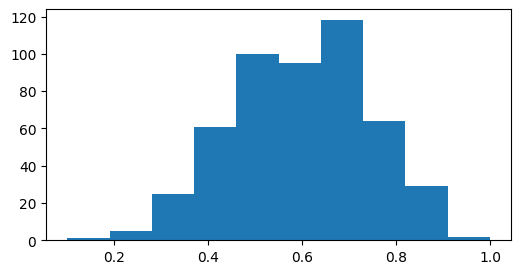

In [109]:
# pHead = 0.6
pHead_obs_06 = np.zeros(500)

for i in range(500):
  pHead_obs_06[i] = toss_biased_coin(pHead=0.6, n= 10)

plt.figure(figsize=[6,3]);
plt.hist(pHead_obs_06);

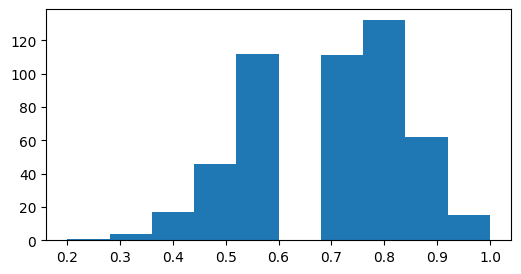

In [112]:
# pHead = 0.7
pHead_obs_07 = np.zeros(500)

for i in range(500):
  pHead_obs_07[i] = toss_biased_coin(pHead=0.7, n= 10)

plt.figure(figsize=[6,3]);
plt.hist(pHead_obs_07);

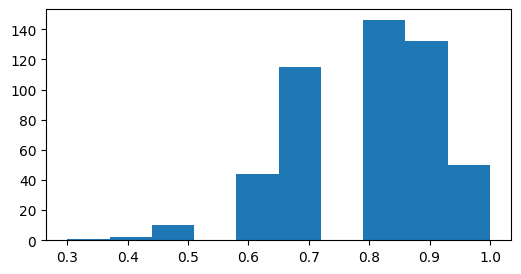

In [116]:
# pHead = 0.8
pHead_obs_08 = np.zeros(500)

for i in range(500):
  pHead_obs_08[i] = toss_biased_coin(pHead=0.8, n= 10)

plt.figure(figsize=[6,3]);
plt.hist(pHead_obs_08);

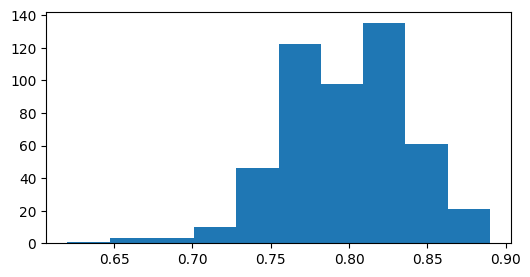

In [105]:
# pHead = 0.8, n = 100
pHead_obs_08_n100 = np.zeros(500)

for i in range(500):
  pHead_obs_08_n100[i] = toss_biased_coin(pHead=0.8, n= 100)

plt.figure(figsize=[6,3]);
plt.hist(pHead_obs_08_n100);

# No3 + 4

In [119]:
#current_obs = pHead_obs_06
#current_obs = pHead_obs_07
current_obs = pHead_obs_08
#current_obs = pHead_obs_08_n100

def p_type2_error(current_obs, lower_thresh, upper_thresh):
    fair_results = 0
    for i in range(500):
        if current_obs[i] >= lower_thresh and current_obs[i] <= upper_thresh:
            fair_results += 1
    p_type_2_error = fair_results/len(current_obs)
    return print(p_type_2_error)

p_type2_error(current_obs, lower_thresh, upper_thresh)

0.636


# Effects of increasing n 
The probability of a type 2 error decreases as n increases. This is because the number of values of a biased coin, that fall into the fair region proportionally decreases in comparison to the number of values that fall into the biased region.